In [1]:
#libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [16]:
# Study data files
happiness_report_path = "World_Happiness_Report_2017.csv"
health_exp_path = "World_Health_Expenditure_Data.csv"

In [17]:
#exporting the csv files 
happiness_report = pd.read_csv(happiness_report_path)
health_exp = pd.read_csv(health_exp_path)

In [18]:
#clean the data
health_exp.dropna(axis=1, how='all', inplace=False)

#select only 2017 percentage expidenture on health as part of country's GDP
health_expenditure = health_exp[["Country", "2017"]]

In [24]:
#Countries we are going to do the comparison
selected_countries_df = health_expenditure[(health_expenditure["Country"]== "Finland") |(health_expenditure["Country"]==  "Sweden")| (health_expenditure["Country"]==  "United States") | (health_expenditure["Country"]==  "Belgium") |(health_expenditure["Country"]==  "Uruguay")|(health_expenditure["Country"]==  "Romania")|(health_expenditure["Country"]==  "Pakistan")|(health_expenditure["Country"]==  "Ghana")|(health_expenditure["Country"]==  "Iraq")|(health_expenditure["Country"]==  "Uganda")|(health_expenditure["Country"]=="Botswana")]
selected_countries_df

,Country,2017
15,Belgium,10.338669
31,Botswana,6.134568
73,Finland,9.206939
81,Ghana,3.262370
111,Iraq,4.166630
182,Pakistan,2.898634
199,Romania,5.157888
221,Sweden,11.018746
245,Uganda,6.187756
248,Uruguay,9.296212


In [25]:
#select the columns needed to plot the graph
happiness = happiness_report[["Country", "Happiness score"]]

#select the countries to work with
happiness_index_df = happiness[(happiness["Country"]== "Finland") |(happiness["Country"]==  "Sweden")| (happiness["Country"]==  "United States") | (happiness["Country"]==  "Belgium") |(happiness["Country"]==  "Uruguay")|(happiness["Country"]==  "Romania")|(happiness["Country"]==  "Pakistan")|(happiness["Country"]==  "Ghana")|(happiness["Country"]==  "Iraq")|(happiness["Country"]==  "Uganda")|(happiness["Country"]==  "Botswana") ]
happiness_index_df


,Country,Happiness score
4,Finland,7.469
8,Sweden,7.284
13,United States,6.993
16,Belgium,6.891
27,Uruguay,6.454
56,Romania,5.825
79,Pakistan,5.269
116,Iraq,4.497
130,Ghana,4.120
132,Uganda,4.081


In [26]:
combined=pd.merge(happiness_index_df,selected_countries_df,on="Country",how="left")
combined

,Country,Happiness score,2017
0,Finland,7.469,9.206939
1,Sweden,7.284,11.018746
2,United States,6.993,17.061269
3,Belgium,6.891,10.338669
4,Uruguay,6.454,9.296212
5,Romania,5.825,5.157888
6,Pakistan,5.269,2.898634
7,Iraq,4.497,4.166630
8,Ghana,4.120,3.262370
9,Uganda,4.081,6.187756


Text(0, 0.5, 'Health Expenditure % as part of the GPD')

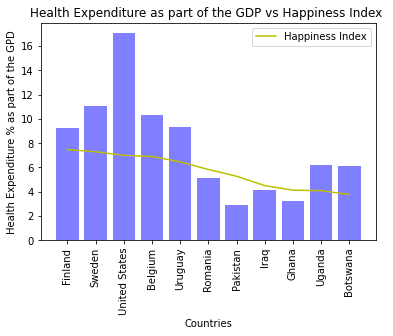

In [22]:
health_gdp_score = combined["2017"]
x_countries = combined["Country"]
life_choices = combined["Happiness score"]
plt.bar(x_countries,health_gdp_score,color="b",alpha=0.5,align="center")
plt.plot(x_countries,life_choices,color="y",label="Happiness Index")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Health Expenditure as part of the GDP vs Happiness Index ")
plt.xlabel("Countries")
plt.ylabel("Health Expenditure % as part of the GPD")